In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv")

In [12]:
display(df.dtypes)
display(df.describe())
display(df.describe(exclude="number"))

recency              int64
history_segment     object
history            float64
mens                 int64
womens               int64
zip_code            object
newbie               int64
channel             object
segment             object
visit                int64
conversion           int64
spend              float64
dtype: object

,recency,history,mens,womens,newbie,visit,conversion,spend
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781,0.009031,1.050908
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890,0.094604,15.036448
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000


,history_segment,zip_code,channel,segment
count,64000,64000,64000,64000
unique,7,3,3,3
top,1) $0 - $100,Surburban,Web,Womens E-Mail
freq,22970,28776,28217,21387


In [8]:
display(df.head())
display(df.tail())

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
63995,10,2) $100 - $200,105.54,1,0,Urban,0,Web,Mens E-Mail,0,0,0.0
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone,Mens E-Mail,0,0,0.0
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0
63999,1,4) $350 - $500,472.82,0,1,Surburban,0,Web,Mens E-Mail,0,0,0.0


### subplot を使う

### 1列にグラフを並べる

In [14]:
# 数値データのみのカラム名を配列で取得
num_list = list(df.select_dtypes(exclude=object).columns)
num_list

['recency',
 'history',
 'mens',
 'womens',
 'newbie',
 'visit',
 'conversion',
 'spend']

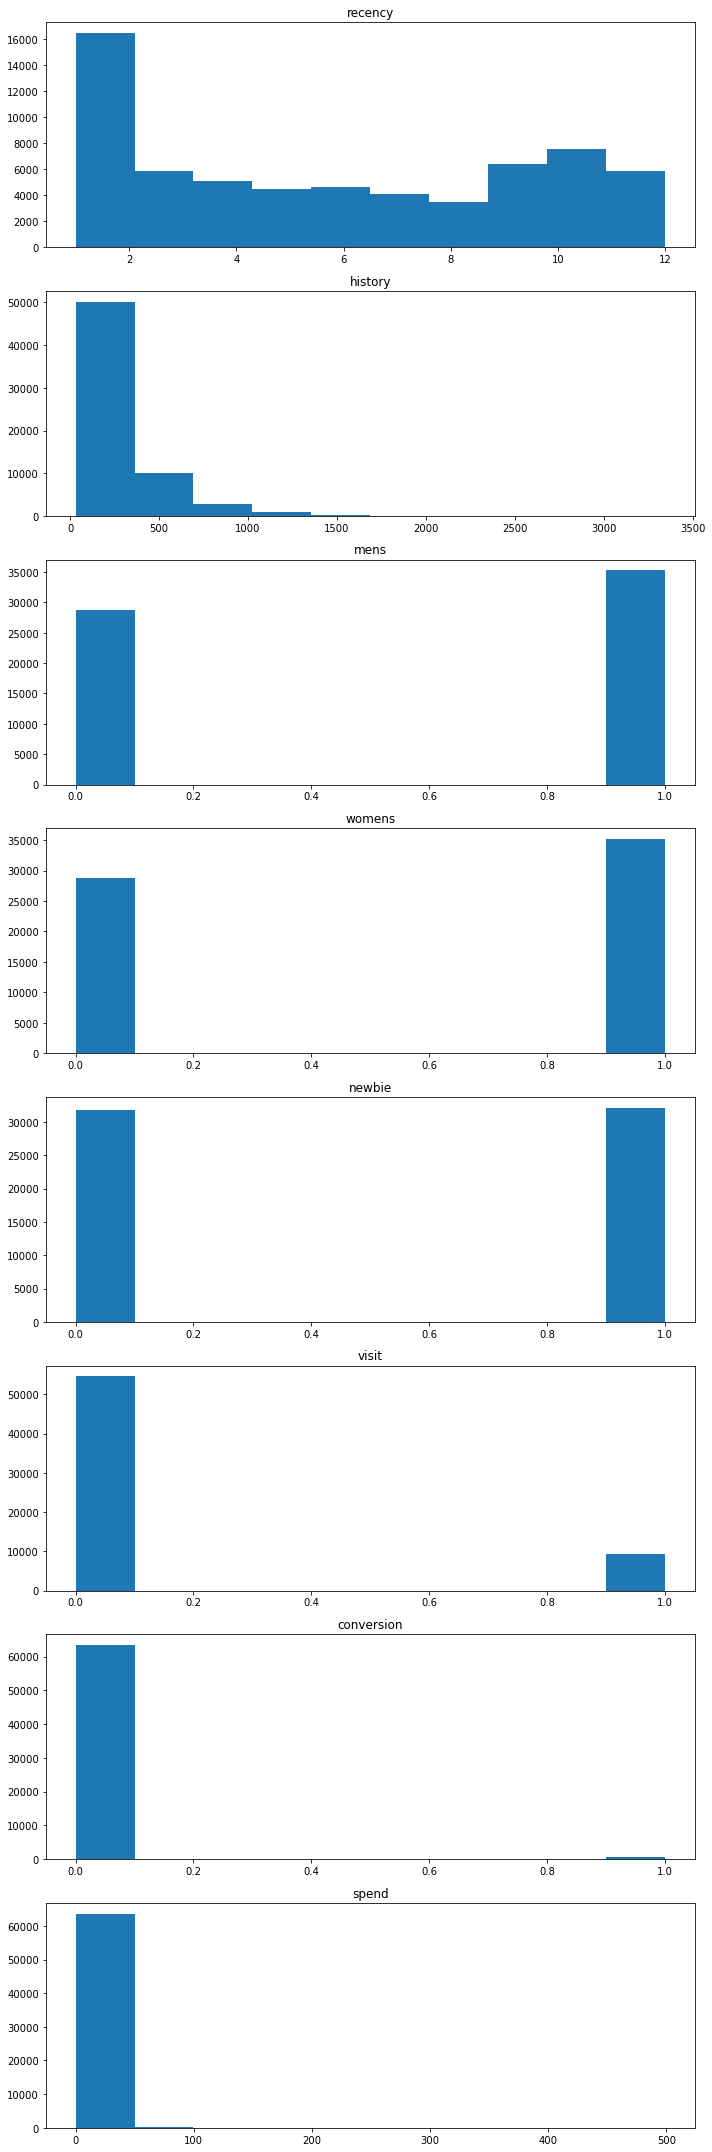

In [44]:
# ヒストグラムを1列に並べる
fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(len(num_list), 1, i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

plt.tight_layout()

### 2列にグラフを並べる

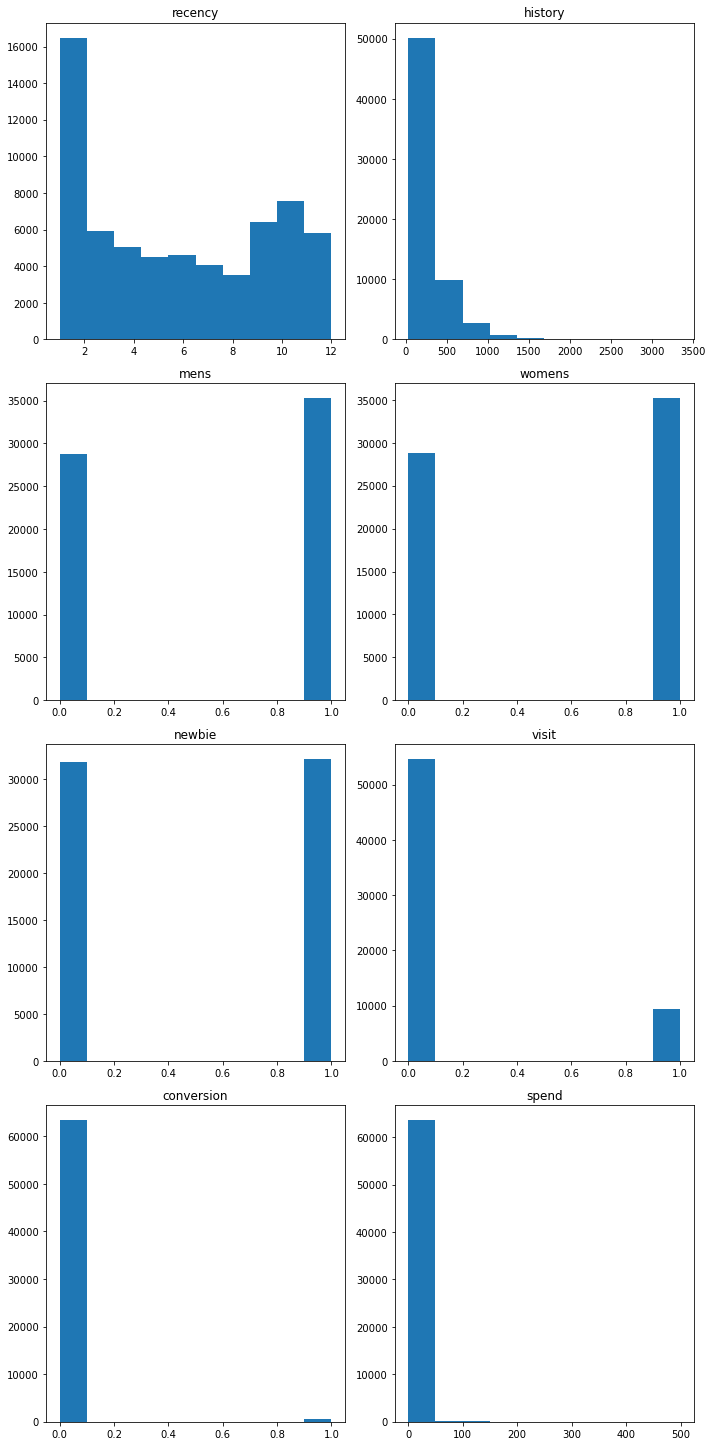

In [93]:
# 単純に2列のグラフを並べる
fig = plt.figure(figsize=(10,40))

for i in range(len(num_list)):
    
    plt.subplot(len(num_list), 2, i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

plt.tight_layout()

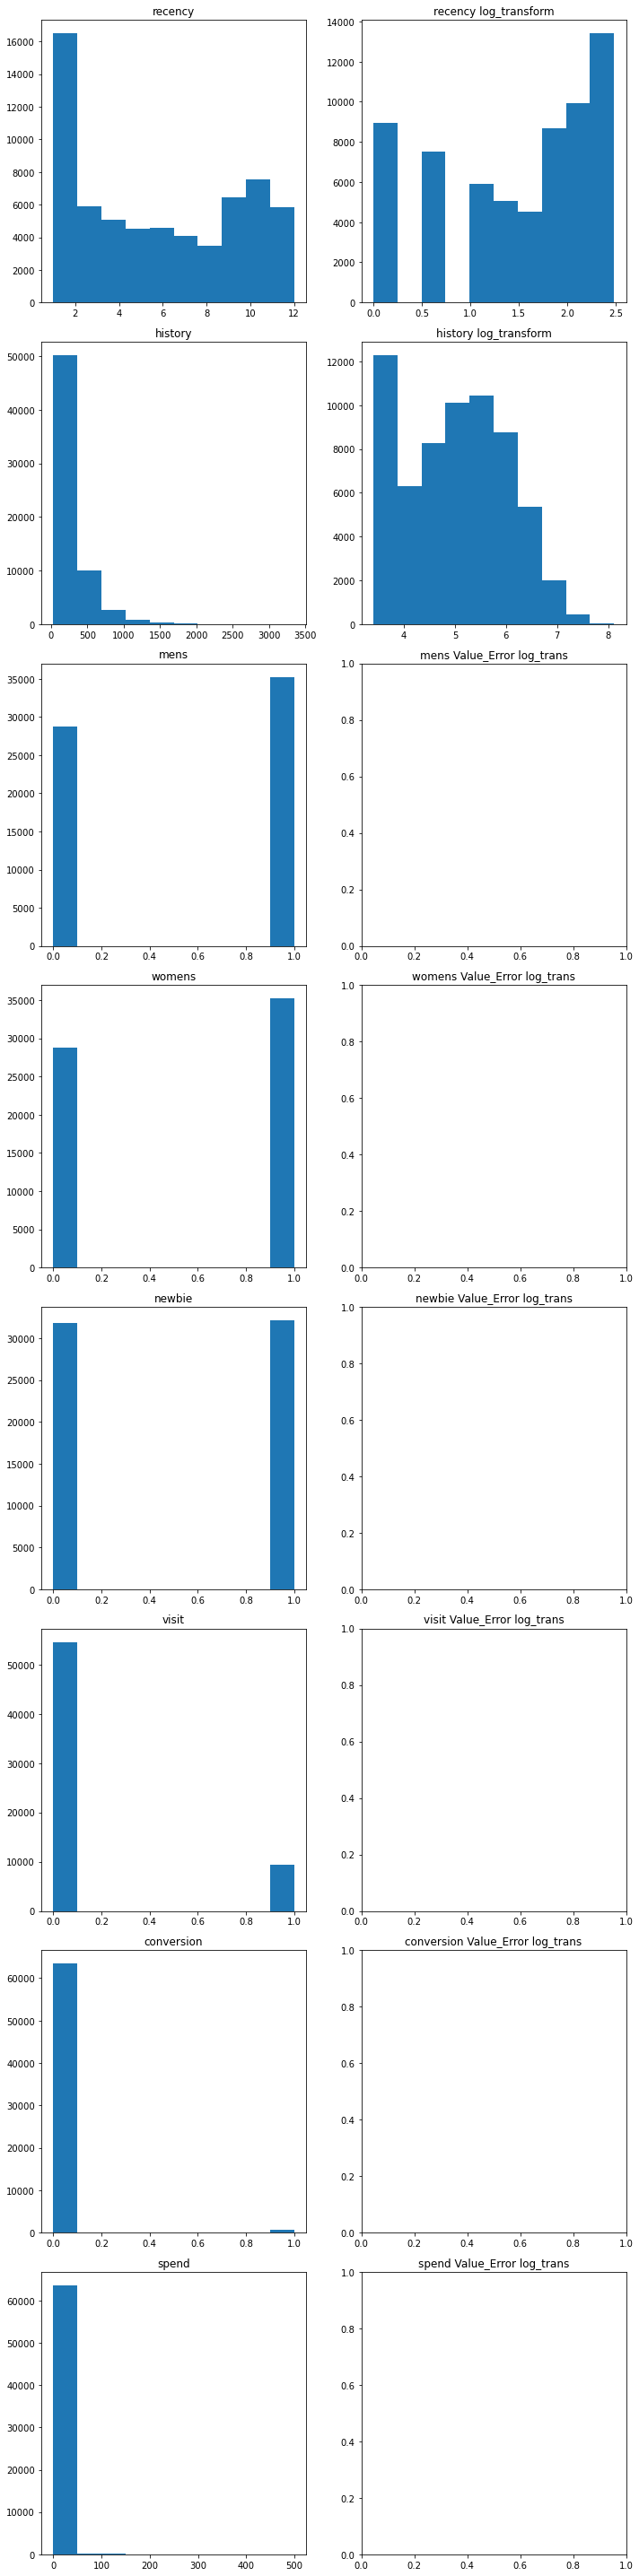

In [67]:
# ヒストグラムを通常バージョンと対数変換後で2列に並べる
# value error になって対数変換できない場合があるのでエラー処理を行う
fig = plt.figure(figsize=(10,40))

for i in range(len(num_list)):
    
    plt.subplot(len(num_list), 2, i*2+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

    try:
        plt.subplot(len(num_list), 2, i*2+2)
        plt.title(num_list[i]+" log_transform")
        plt.hist(df[num_list[i]].apply(np.log))
    except ValueError:
        plt.subplot(len(num_list), 2, i*2+2)
        plt.title(num_list[i]+" Value_Error log_trans")
    
plt.tight_layout()

### subplots を使う

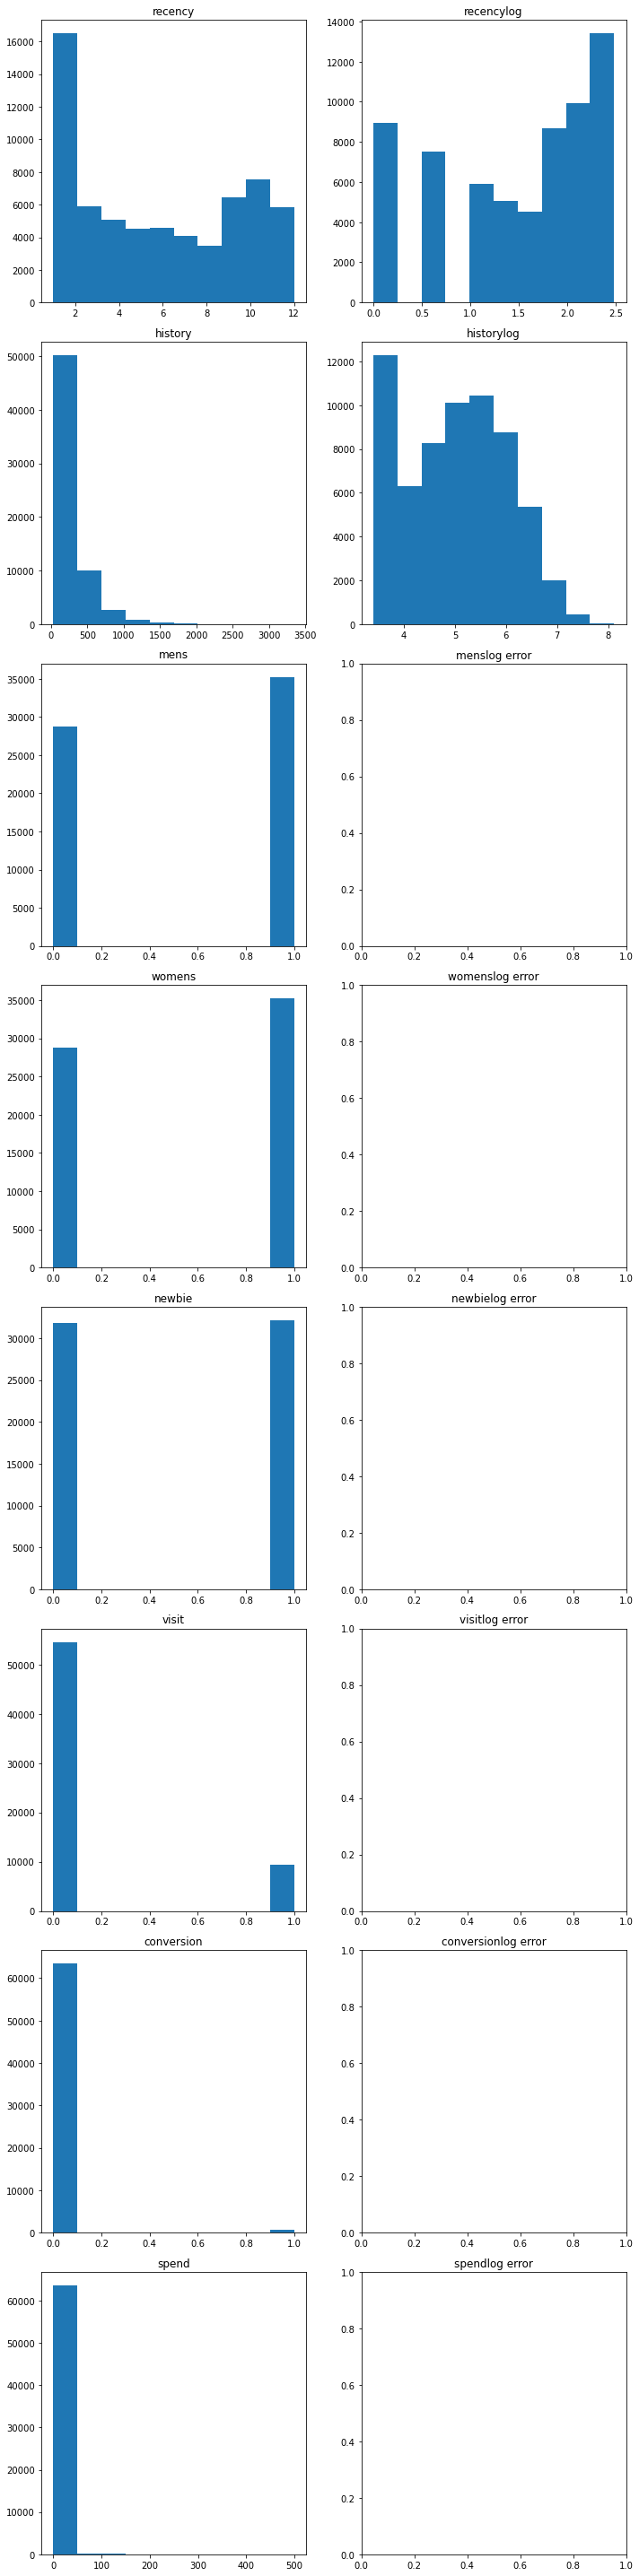

In [91]:
fig, axes= plt.subplots(len(num_list),2, figsize=(10,40))

for i in range(len(num_list)):
    axes[i][0].set_title(num_list[i])
    axes[i][0].hist(df[num_list[i]])

    try:
        axes[i][1].set_title(num_list[i]+ "log")
        axes[i][1].hist(df[num_list[i]].apply(np.log))
    except ValueError:
        axes[i][1].set_title(num_list[i]+ "log error")

plt.tight_layout()